# **ASSIGNMENT #0002**
# **Detecting Kidney Stone using Image Processing**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # OpenCV Library
from PIL import Image # Pillow Library

In [2]:
ks_1 = Image.open('../assets/img/assn2/blausen_kidney_stones.png')
ks_2 = Image.open('../assets/img/assn2/kidney.jpg')

ks_xray = Image.open("../assets/img/assn2/kstones_abdominal_x-ray.jpg")
ks_3mm = Image.open('../assets/img/assn2/3mmstone.png')
ks_ct = Image.open('../assets/img/assn2/ct_measurement.jpg')
ks_ultra = Image.open('../assets/img/assn2/ultrasonography_of_renal_stone.jpg')

In [3]:
ks_xray.mode

'L'

In [4]:
def show_fig(img1,title1,img2,title2):
    plt.figure(1,figsize=(10,10))
    plt.subplot(121)
    plt.imshow(img1,cmap='gray')
    plt.title(title1)
    #plt.xticks([]),plt.yticks([])

    plt.subplot(122)
    plt.imshow(img2,cmap='gray')
    plt.title(title2)
    #plt.xticks([]),plt.yticks([])
    plt.show()

# **Definition**

**Kidney stone disease**, also known as nephrolithiasis or urolithiasis, is when a solid piece of material (**[kidney stone](https://en.wikipedia.org/wiki/Calculus_(medicine))**) develops in the urinary tract. Kidney stones typically form in the kidney and leave the body in the urine stream. A small stone may pass without causing symptoms. If a stone grows to more than 5 millimeters (0.2 in), it can cause blockage of the ureter, resulting in severe pain in the lower back or abdomen. A stone may also result in blood in the urine, vomiting, or painful urination. About half of people who have had a kidney stone will have another within ten years. [Read more...](https://en.wikipedia.org/wiki/Kidney_stone_disease)

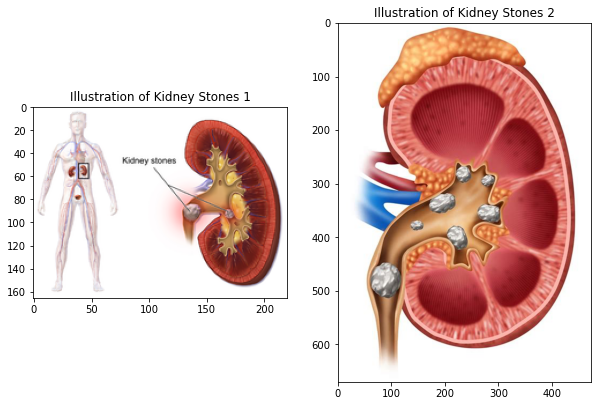

In [5]:
show_fig(ks_1,"Illustration of Kidney Stones 1",ks_2,"Illustration of Kidney Stones 2")

# **Kidney Stone Medical Imaging Techniques**

Diagnosis of kidney stones is made on the basis of information obtained from the history, physical examination, urinalysis, and radiographic studies. Clinical diagnosis is usually made on the basis of the location and severity of the pain, which is typically colicky in nature (comes and goes in spasmodic waves). Pain in the back occurs when calculi produce an obstruction in the kidney. Physical examination may reveal fever and tenderness at the costovertebral angle on the affected side.

### **Helical CT Scan**

In people with a history of stones, those who are less than 50 years of age and are presenting with the symptoms of stones without any concerning signs do not require [helical CT scan](https://en.wikipedia.org/wiki/Helical_cone_beam_computed_tomography) imaging. 

*Note: A **CT scan** is also **not** typically **recommended** in children.*

Otherwise a noncontrast helical CT scan with 5 millimeters (0.2 in) sections is the diagnostic method to use to detect kidney stones and confirm the diagnosis of kidney stone disease. Near all stones are detectable on CT scans with the exception of those composed of certain drug residues in the urine, such as from [indinavir](https://en.wikipedia.org/wiki/Indinavir). Calcium-containing stones are relatively [radiodense](https://en.wikipedia.org/wiki/Radiodensity), and they can often be detected by a traditional radiograph of the abdomen that includes the [kidneys, ureters, and bladder](https://en.wikipedia.org/wiki/Kidneys,_ureters,_and_bladder_x-ray) (KUB film) Some 60% of all renal stones are radiopaque. In general, calcium phosphate stones have the greatest density, followed by calcium oxalate and magnesium ammonium phosphate stones. Cystine calculi are only faintly radiodense, while [uric acid](https://en.wikipedia.org/wiki/Uric_acid) stones are usually entirely [radiolucent](https://en.wikipedia.org/wiki/Radiolucent).

### **Intravenous Pyelogram**

Where a CT scan is unavailable, an [intravenous pyelogram](https://en.wikipedia.org/wiki/Intravenous_pyelogram) may be performed to help confirm the diagnosis of urolithiasis. This involves intravenous injection of a contrast agent followed by a KUB film. [Uroliths](https://en.wikipedia.org/wiki/Urolith) present in the kidneys, ureters, or bladder may be better defined by the use of this [contrast agent](https://en.wikipedia.org/wiki/Radiocontrast). Stones can also be detected by a [retrograde pyelogram](https://en.wikipedia.org/wiki/Retrograde_pyelogram), where a similar contrast agent is injected directly into the distal ostium of the ureter (where the ureter terminates as it enters the bladder).

### **Ultrasonography** 

[Renal ultrasonography](https://en.wikipedia.org/wiki/Renal_ultrasonography) can sometimes be useful, because it gives details about the presence of [hydronephrosis](https://en.wikipedia.org/wiki/Hydronephrosis), suggesting that the stone is blocking the outflow of urine. Radiolucent stones, which do not appear on KUB, may show up on ultrasound imaging studies. Other advantages of renal ultrasonography include its low cost and absence of [radiation exposure](https://en.wikipedia.org/wiki/Radiology). **Ultrasound imaging** is useful for detecting stones in situations where X-rays or CT scans are discouraged, such as in children or pregnant women. Despite these advantages, renal ultrasonography in 2009 was not considered a substitute for noncontrast helical CT scan in the initial diagnostic evaluation of urolithiasis. The main reason for this is that, compared with CT, renal ultrasonography more often fails to detect small stones (especially ureteral stones) and other serious disorders that could be causing the symptoms. A 2014 study confirmed that [ultrasonography](https://en.wikipedia.org/wiki/Ultrasonography) rather than CT as an initial diagnostic test results in less radiation exposure and did not find any significant complications.

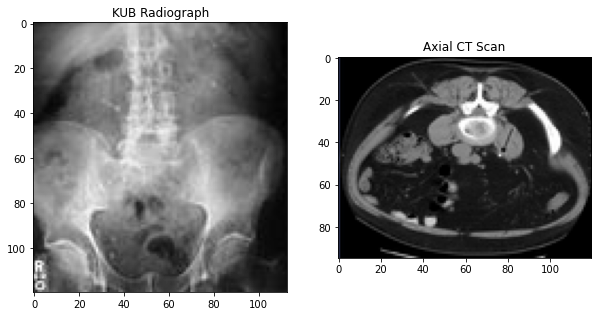

In [6]:
show_fig(ks_xray,"KUB Radiograph",ks_3mm,"Axial CT Scan")

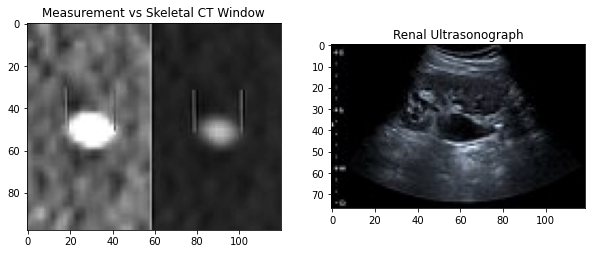

In [7]:
show_fig(ks_ct,"Measurement vs Skeletal CT Window",ks_ultra,"Renal Ultrasonograph")

# **Kidney Stone Detection in Ultrasound Images** 

Kidney stone region of interest detection in ultrasound image is a challenging task due to **heterogeneous** texture and presence of speckle noise. **The ultrasound scanning is most frequently used tool to examine the patient for abnormities, especially presence of stone, in the kidney.** Automatic object detection in ultrasound images is burning research areas and the present research work is in the same direction. We have developed an application, which helps the medical practitioner to identify the stone region in the ultrasound image. 

Ultrasound imaging is one of the available imaging techniques used for diagnosis of kidney abnormalities, which may be like change in shape and position and swelling of limb; there are also other Kidney abnormalities such as **formation of stones**, **cysts**, **blockage of urine**, **congenital anomalies**, and **cancerous cells**. During surgical processes it is vital to recognize the true and precise location of kidney stone. The detection of kidney stones using ultrasound imaging is a highly challenging task as they are of low contrast and contain speckle noise. This challenge is overcome by employing suitable image processing techniques. 

The ultrasound image is first preprocessed to get rid of **speckle noise** using the image restoration process. 

The restored image is smoothened using Gabor filter and the subsequent image is enhanced by **histogram equalization**. 

The preprocessed image is achieved with level set segmentation to detect the stone region. Segmentation process is employed twice for getting better results; first to segment kidney portion and then to segment the stone portion, respectively. In this work, the level set segmentation uses two terms, namely, momentum and resilient propagation to detect the stone portion. 

After segmentation, the extracted region of the kidney stone is given to Symlets, Biorthogonal, and Daubechies lifting scheme wavelet subbands to extract energy levels. These energy levels provide evidence about presence of stone, by comparing them with that of the normal energy levels.

# **Objective**

The main objective of this work is to detect the kidney stone from a digital ultrasound image of the kidney by performing various image processing techniques. But, the image produced by the ultrasound techniques is not suitable for further processing due to low contrast and the presence of speckle noise. Hence, the study also examined the effectiveness of various denoising techniques on the ultrasound image to enhance the quality of the image.Further, the enhanced ultrasound image is used to locate the exact position of the stone. The project is to develop an elementary and straightforward technique to find the stone in the kidney. This detection can be done in any available computer and hence anyone can check an ultrasound image for a  kidney stone and dissolve it in the starting stage. These techniques mainly help the doctor to further treat the patient based on the size and location of the stone. 

# **Approach**

#### **Given Ultrasound Image Enhancement**

1. The first one we applied was **Frequency Domain** + **Gaussian Filter**. Here we had to divide the image into two plains real plain and complex plain and then apply the Gaussian Filter in both.

2. The second attempt was with **Gaussian Blur** + **Laplacian Filter**. We had to apply Gaussian Blur to make Laplacian filter less sensitive to noise.

3. On further studies, we found in some research papers that Ultrasounds give speckle noise. So, our third attempt was to replace **Gaussian Blur** with **Median Blur** as the latter is more effective for low-level noises like speckle noise, salt-and-pepper noise etc. followed by **Laplacian filter**.

4. In the application of the **Gabor filter**, the restored image is enriched with **optimal resolution** in both spatial and frequency domains (as stated in one of the research papers, whose link is given below). 2-D Gabor filter is easier to tune the direction and radial frequency bandwidth, and easier to tune centre frequency, so they can simultaneously get the best resolution in the spatial domain and frequency domain.

In [8]:
ultrasound = cv2.imread('../assets/img/assn2/ultrasonography_of_renal_stone.jpg',0)
ultra_img1 = cv2.imread('../assets/img/assn2/ultrasounds/image1.jpg',0)
ultra_img2 = cv2.imread('../assets/img/assn2/ultrasounds/image2.jpg',0)
ultra_img3 = cv2.imread('../assets/img/assn2/ultrasounds/image3.jpg',0)
ultra_img4 = cv2.imread('../assets/img/assn2/ultrasounds/image4.jpg',0)

In [9]:
def get_filters():
    filters = list()
    ker_size = 31
    for alpha in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ker_size,ker_size),'sigma':0.0225,'theta':alpha,
              'lambd':15.0,'gamma':0.01,'psi':0,'ktype':cv2.CV_32F}
        kernel = cv2.getGaborKernel(**params)
        kernel /= 1.5*kernel.sum()
        filters.append((kernel, params))
    return filters

In [10]:
def process_image(img,filters):
    acc = np.zeros_like(img)
    for k, p in filters:
        filtered_img = cv2.filter2D(img, cv2.CV_8UC3, k)
        np.maximum(acc, filtered_img, acc)
    return acc

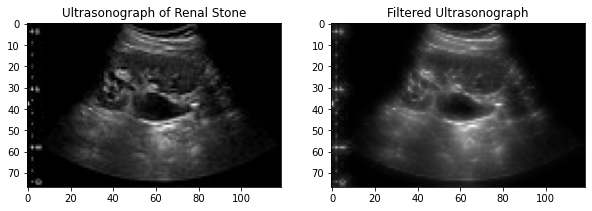

In [11]:
filters = get_filters()
fimg = process_image(ultrasound,filters)
show_fig(ultrasound,"Ultrasonograph of Renal Stone",fimg,"Filtered Ultrasonograph")

#### **Histogram Equalization**

It is a technique for adjusting image intensities to enhance contrast. It assigns the intensity values of pixels in the input image such that the output image contains a uniform distribution of intensities. It improves contrast and obtains a uniform histogram. This technique can be used on a whole image or just on a part of an image. This process leads to an increase in contrast of the shadow of the stone and the stone itself. Thus, it became more visible.

In [12]:
def histo_eq(img):
    return cv2.equalizeHist(img)

def gabor_filter(img):
    filters = get_filters()
    return process_image(img,filters)

def lapacian(img,param):
    lap = cv2.Laplacian(img,cv2.CV_64F)
    sharp = img - param*lap
    sharp = np.uint8(cv2.normalize(sharp, None, 0 , 255, cv2.NORM_MINMAX))
    return sharp

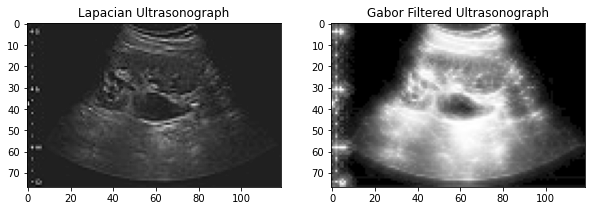

In [13]:
lap = lapacian(ultrasound,0.239)
fimg = histo_eq(fimg)
show_fig(lap,"Lapacian Ultrasonograph",fimg,"Gabor Filtered Ultrasonograph")

#### **Ultrasound Image Segmentation** 

It partitions an image into distinct regions containing each pixel with similar attributes. To be meaningful and useful for image analysis and interpretation, the regions should strongly relate to depicted objects or features of interest. Meaningful segmentation is the first step from low-level image processing transforming a greyscale or colour image into one or more other images to high-level image description in terms of features, objects, and scenes. Hereby performing this, we needed to partition our stone from the rest of the image. The type of Image Segmentation used here is **Watersheds**. Here we divide the image into peaks (high intensity) and valleys (low intensity). We fill the valleys (points of minima or background) with water of different colours (labels). As the water rises, depending on the peaks(gradients) nearby, water from different valleys, obviously with different colours will start to merge. To avoid this, we need to build barriers in the area where the water is mixing. Also, we continue the process of filling water until all the peaks are under water. The barriers, thus, created are the result of image segmentation. Now, the shadow gets separated from the stone giving a clear image of the stone.

In [14]:
def watershed(img,path):
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) # noise removal    
    bg = cv2.dilate(opening,kernel,iterations=3) # finding background
    dist_trans = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, fg = cv2.threshold(dist_trans,0.23*dist_trans.max(),255,0) # finding foreground
    fg = np.uint8(fg)
    unknown = cv2.subtract(bg,fg) # unknown region
    
    ret, markers = cv2.connectedComponents(fg)
    markers += 1
    markers[unknown==255] = 0 # mark unknown region with zero
    img2 = cv2.imread(path)
    img2 = cv2.medianBlur(img2,5)
    markers = cv2.watershed(img2,markers)
    img2[markers == -1] = [215,0,0]
    return img2

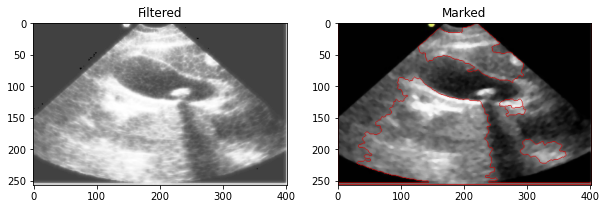

In [15]:
fimg2 = gabor_filter(ultra_img2)
fimg2 = histo_eq(fimg2) 
seg_img = watershed(fimg2,'../assets/img/assn2/ultrasounds/image2.jpg')
show_fig(fimg2,"Filtered",seg_img,'Marked')

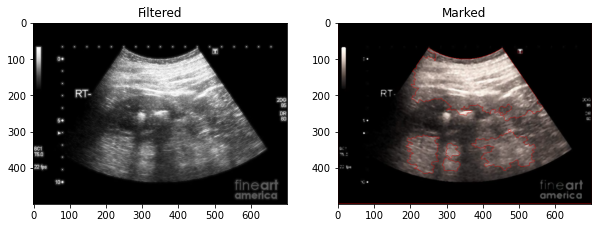

In [16]:
fimg4 = gabor_filter(ultra_img4)
seg_img = watershed(fimg4,'../assets/img/assn2/ultrasounds/image4.jpg')
show_fig(fimg4,"Filtered",seg_img,'Marked')

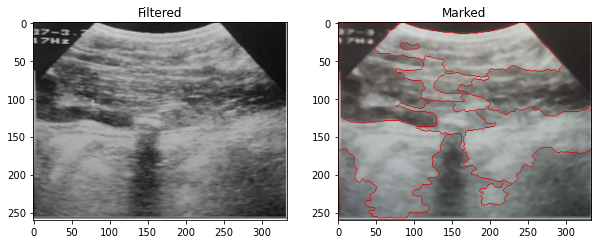

In [17]:
fimg3 = lapacian(ultra_img3,0.239)
seg_img = watershed(fimg3,'../assets/img/assn2/ultrasounds/image3.jpg')
show_fig(fimg3,"Filtered",seg_img,'Marked')